# An Overview of the CTC

## Markov Models

To start with this we need to introduce

In [1]:
import torch
from torch import nn

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# plt.style.use("seaborn")
sns.set()


In [36]:


N = 1
C = 5
T = 20

giant_activ = (1, 12)

d = torch.rand(T, N, C)
d[giant_activ[1]][0][] += 5
d.requires_grad_()

ctcloss = nn.CTCLoss()
target = torch.IntTensor([1,2,3,4])
inlen = torch.IntTensor([T])
target_len = torch.IntTensor([4])

hval = {}
def dhook(grad):
    hval["dgrad"] = grad
    return grad

d.register_hook(dhook);


In [37]:
loss = ctcloss(d.log_softmax(2), target, inlen, target_len)
loss.backward()

In [38]:
initial = d.softmax(2).squeeze(1).T.detach().numpy()
grad = hval["dgrad"].squeeze(1).T.detach().numpy()

(1, 12)

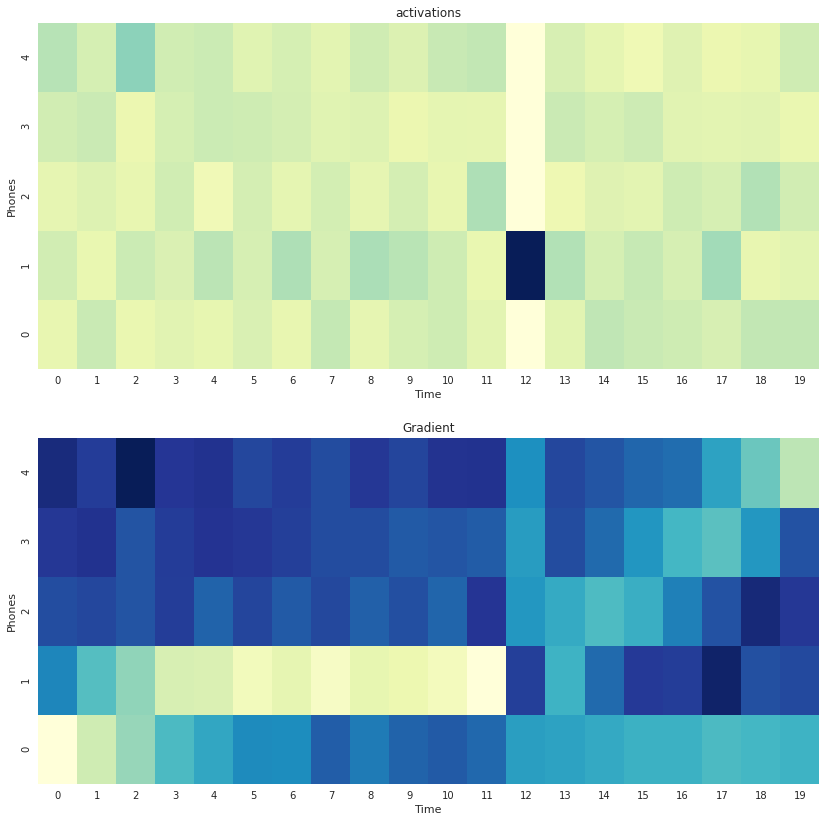

In [39]:
def posteriorgram(dat, gradient):
    plt.figure(figsize=(14,14))
    plt.subplot(211)
    sns.heatmap(dat, cmap="YlGnBu", cbar=False)
    plt.xlabel("Time")
    plt.ylabel("Phones")
    plt.title("activations")
    plt.gca().invert_yaxis()
    plt.subplot(212)
    sns.heatmap(gradient, cmap="YlGnBu", cbar=False)
    plt.xlabel("Time")
    plt.ylabel("Phones")
    plt.title("Gradient")
    plt.gca().invert_yaxis()
    
posteriorgram(initial, grad)
np.unravel_index(initial.argmax(), initial.shape)

In [40]:
plt.figure(figsize=(14,7))


<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>